In [2]:
! pip install pandas matplotlib koreanize_matplotlib scipy psycopg2-binary

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 26.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 25.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 57.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 45.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 60.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.4/310.4 kB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 57.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.4 MB/s eta 0:00

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import koreanize_matplotlib
import scipy
import psycopg2

In [6]:
from getpass import getpass
hosts = getpass("호스트 입력 :")
dbname = getpass("db 입력 :")
user = getpass("user 입력 :")
password = getpass("password 입력 :")
port = getpass("port 입력 :")
connection = psycopg2.connect(f"host={hosts} dbname={dbname} user={user} password={password} port={port}")

호스트 입력 : ········
db 입력 : ········
user 입력 : ········
password 입력 : ········
port 입력 : ········


In [8]:
cursor = connection.cursor()

In [10]:
formula = """
SELECT * FROM tourist_entry;
"""

cursor.execute(formula)
columns = [desc[0] for desc in cursor.description]
data = cursor.fetchall() 

df = pd.DataFrame(data, columns=columns)

## EDA 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ed        276 non-null    object
 1   edCd      276 non-null    object
 2   natCd     276 non-null    object
 3   natKorNm  276 non-null    object
 4   num       276 non-null    object
 5   rnum      276 non-null    object
 6   ym        276 non-null    object
dtypes: object(7)
memory usage: 15.2+ KB


In [15]:
df

,ed,edCd,natCd,natKorNm,num,rnum,ym
0,방한외래관광객,E,101,아프가니스탄,25,1,202301
1,방한외래관광객,E,112,중 국,24946,1,202301
2,방한외래관광객,E,120,홍 콩,26777,1,202301
3,방한외래관광객,E,124,인 도,4481,1,202301
4,방한외래관광객,E,125,인도네시아,12838,1,202301
...,...,...,...,...,...,...,...
271,방한외래관광객,E,326,그리스,468,1,202312
272,방한외래관광객,E,334,아일랜드,491,1,202312
273,방한외래관광객,E,335,이탈리아,2800,1,202312
274,방한외래관광객,E,306,벨기에,881,1,202312


In [18]:
df.num = df.num.astype('int64')

In [22]:
df.ym = pd.to_datetime(df.ym.str[:4] +"-"+ df.ym.str[4:])

In [26]:
df.ym = df.ym.dt.strftime('%Y-%m')

In [30]:
df = df.sort_values(by='num', ascending=False)\
    .reset_index(drop=True)

In [31]:
df

,ed,edCd,natCd,natKorNm,num,rnum,ym
0,방한외래관광객,E,130,일 본,278322,1,2023-11
1,방한외래관광객,E,112,중 국,263940,1,2023-09
2,방한외래관광객,E,130,일 본,263453,1,2023-08
3,방한외래관광객,E,112,중 국,259659,1,2023-08
4,방한외래관광객,E,130,일 본,255092,1,2023-10
...,...,...,...,...,...,...,...
271,방한외래관광객,E,309,보스니아-헤르체고비나,14,1,2023-12
272,방한외래관광객,E,309,보스니아-헤르체고비나,12,1,2023-09
273,방한외래관광객,E,309,보스니아-헤르체고비나,12,1,2023-08
274,방한외래관광객,E,309,보스니아-헤르체고비나,10,1,2023-02


In [37]:
df

,ed,edCd,natCd,natKorNm,num,rnum,ym
0,방한외래관광객,E,130,일 본,278322,1,2023-11
1,방한외래관광객,E,112,중 국,263940,1,2023-09
2,방한외래관광객,E,130,일 본,263453,1,2023-08
3,방한외래관광객,E,112,중 국,259659,1,2023-08
4,방한외래관광객,E,130,일 본,255092,1,2023-10
...,...,...,...,...,...,...,...
271,방한외래관광객,E,309,보스니아-헤르체고비나,14,1,2023-12
272,방한외래관광객,E,309,보스니아-헤르체고비나,12,1,2023-09
273,방한외래관광객,E,309,보스니아-헤르체고비나,12,1,2023-08
274,방한외래관광객,E,309,보스니아-헤르체고비나,10,1,2023-02


## 국가별 출국 인원 분포

In [45]:
target = round(df.groupby('natKorNm')['num'].mean().sort_values(ascending=False).to_frame('mean'))

target

,mean
natKorNm,
일 본,193036.0
중 국,168285.0
미 국,90535.0
베트남,35057.0
홍 콩,33665.0
태 국,31620.0
싱가포르,28984.0
필리핀,28568.0
인도네시아,20854.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, '일  본'),
  Text(1, 0, '중  국'),
  Text(2, 0, '미  국'),
  Text(3, 0, '베트남'),
  Text(4, 0, '홍  콩'),
  Text(5, 0, '태  국'),
  Text(6, 0, '싱가포르'),
  Text(7, 0, '필리핀'),
  Text(8, 0, '인도네시아'),
  Text(9, 0, '캐나다'),
  Text(10, 0, '몽  골'),
  Text(11, 0, '프랑스'),
  Text(12, 0, '독  일'),
  Text(13, 0, '인  도'),
  Text(14, 0, '이탈리아'),
  Text(15, 0, '터  키'),
  Text(16, 0, '벨기에'),
  Text(17, 0, '파키스탄'),
  Text(18, 0, '아일랜드'),
  Text(19, 0, '그리스'),
  Text(20, 0, '이  란'),
  Text(21, 0, '아프가니스탄'),
  Text(22, 0, '보스니아-헤르체고비나')])

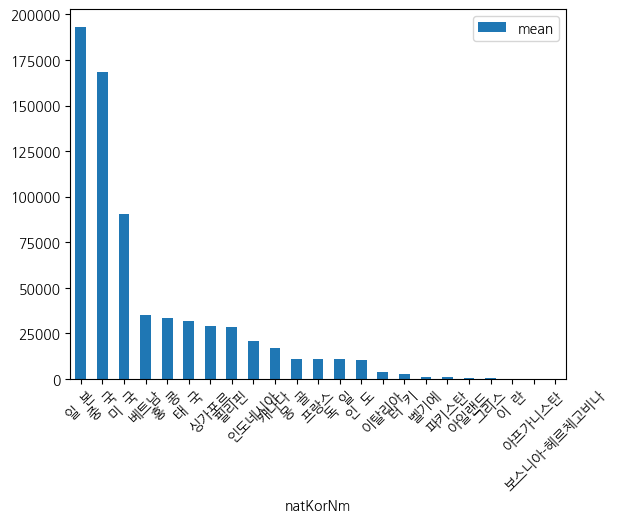

In [46]:
target.plot(kind='bar')
plt.xticks(rotation=45)

# 차트를 간결하게 바꾸려고 한다. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '일  본'),
  Text(1, 0, '중  국'),
  Text(2, 0, '미  국'),
  Text(3, 0, '베트남'),
  Text(4, 0, '홍  콩'),
  Text(5, 0, '태  국'),
  Text(6, 0, '싱가포르'),
  Text(7, 0, '필리핀'),
  Text(8, 0, '인도네시아')])

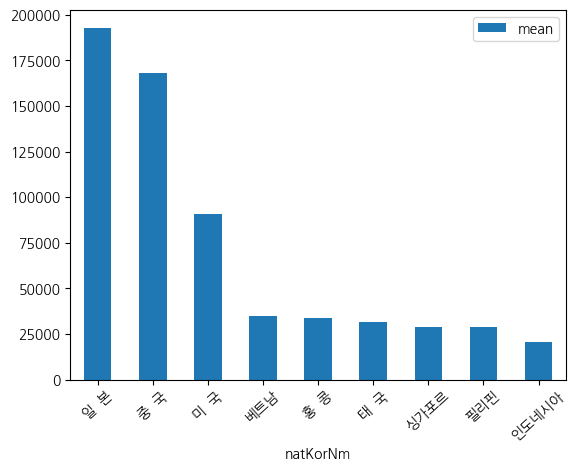

In [59]:
lst = df.loc[df.num >= 25000]['natKorNm'].unique()

target2 = df.loc[df.natKorNm.isin(lst)]

target2.groupby('natKorNm')['num'].mean()\
        .sort_values(ascending=False)\
        .to_frame('mean')\
        .plot(kind='bar')

plt.xticks(rotation=42)

In [62]:
for txt in lst:
    print(txt)

일  본
중  국
미  국
싱가포르
태  국
베트남
필리핀
홍  콩
인도네시아


## 통계 결과 

2023년 주요 26국중 우리나라를 자주 온 국가는 
1. 일본(19만명), 중국(16만명), 미국(9만명)이다 [총 평균값]
   - 일본 관광객이 늘어나는 이유에 대해서 탐색
   - https://www.hankyung.com/article/202309199826i
   
   ![뉴스이미지](https://img.hankyung.com/photo/202309/01.34549176.1.jpg)
  
   ### 일본 젊은이들의 한국 여행 증가와 K푸드 인기 상승

    일본의 젊은이들이 신오쿠보에서 한국 음식을 즐기고 있으며, 이러한 관심이 한국 여행으로 이어지고 있습니다. ‘고독한 미식가’의 작가 쿠스미 마사유키는 일본의 젊은 세대가 한국 음식을 즐기는 현상을 설명하며, 한국 여행 수요 증가를 언급했습니다. 팬데믹 동안 한국 드라마와 음식을 즐기는 ‘도한(渡韓)놀이’를 하던 일본인들이 이제 한국을 방문하고 있으며, 이 흐름은 특히 2030세대 여성들 사이에서 두드러집니다.
    
    2023년 1~7월 동안 한국을 찾은 일본인 관광객은 107만 명으로 전체 외국인 관광객 중 19.7%를 차지해 국적별 1위를 기록했습니다. 일본인의 한국 여행에 대한 선호는 강력하며, 일본 여행사 조사에 따르면 여름 휴가철 한국이 가장 인기 있는 여행지로 나타났습니다. 일본인 중 한국을 여러 번 방문한 비율도 전 세계 평균을 웃돌고 있습니다.
    
    한국을 찾는 일본인 관광객의 대다수는 2030 여성으로, K콘텐츠와 한국 음식을 즐기는 ‘4차 한류’ 세대입니다. 정부는 이러한 수요를 더욱 확대하기 위해 남성 관광객을 유치하는 전략을 추진 중입니다. 마사유키 작가가 촬영한 서울 맛집 영상과 K푸드를 주제로 한 가이드북을 활용해 남성들의 한국 여행을 장려할 계획입니다.


## 의문 

- 정말로 일본인의 방문객이 1-7월 동안 100만여명이 맞을까? 

In [63]:
df.columns

Index(['ed', 'edCd', 'natCd', 'natKorNm', 'num', 'rnum', 'ym'], dtype='object')

In [71]:
sum_targets = df.groupby('natKorNm')['num'].sum()\
    .sort_values(ascending=False)\
    .to_frame('sum')

sum_targets.iloc[0].to_frame()

,일 본
sum,2316429


## 합계결과 
- 230만명으로 집계, 실제 1-7월 데이터 비교

In [78]:
jap_target = df.loc[(df.natKorNm == '일  본') & df.ym.isin([str(x)[:4]+"-"+str(x)[4:] for x in range(202301,202308)])] 

jap_target


,ed,edCd,natCd,natKorNm,num,rnum,ym
10,방한외래관광객,E,130,일 본,211468,1,2023-07
11,방한외래관광객,E,130,일 본,196512,1,2023-06
13,방한외래관광객,E,130,일 본,192318,1,2023-03
14,방한외래관광객,E,130,일 본,183691,1,2023-05
16,방한외래관광객,E,130,일 본,128309,1,2023-04
25,방한외래관광객,E,130,일 본,94393,1,2023-02
31,방한외래관광객,E,130,일 본,66900,1,2023-01


In [79]:
[str(x)[:4]+"-" + str(x)[4:] for x in range(202301,202308)]

['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07']

In [83]:
jap_target.groupby('natKorNm')['num'].sum()\
    .to_frame('sum')

,sum
natKorNm,
일 본,1073591


## 검증 결과 

100만명이 맞다 

## 그렇다면 찾고자 하는 데이터의 대한 의문 

1. 뉴스 기사와 같이 일본에서 방문하는 관광객의 비중 대다수는 2030 일본 여성들이라고 하는데, 정말로 일본 여성들이 주류일까?
   - 그에 따라서 연령별 데이터를 추출하고자 한다.

## 한계 

- 일일트래픽 초과로 데이터 갖고오기가 존나 힘듬
- 내일 다시 예정 